In [ ]:
using DataFrames, CSV, Statistics, Plots, Polynomials, StatPlots

┌ Info: Recompiling stale cache file /home/mateusz/.julia/compiled/v1.0/DataFrames/AR9oZ.ji for DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1187
┌ Info: Recompiling stale cache file /home/mateusz/.julia/compiled/v1.0/CSV/HHBkp.ji for CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1187
┌ Info: Precompiling StatPlots [60ddc479-9b66-56df-82fc-76a74619b69c]
└ @ Base loading.jl:1189
┌ Info: Recompiling stale cache file /home/mateusz/.julia/compiled/v1.0/Distributions/xILW0.ji for Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1187
┌ Info: Recompiling stale cache file /home/mateusz/.julia/compiled/v1.0/Widgets/F5dj0.ji for Widgets [cc8bc4a8-27d6-5769-a93b-9d913e69aa62]
└ @ Base loading.jl:1187
┌ Info: Recompiling stale cache file /home/mateusz/.julia/compiled/v1.0/Clustering/Ovl2Q.ji for Clustering [aaaa29a8-35af-508c-8bc3-b662a17a0fe5]
└ @ Base loading.jl:1187


In [ ]:
julia_data = CSV.read("julia-times2.csv", delim=",")
c_data_O0 = CSV.read("c-times-O0.csv", delim=",")
c_data_O3 = CSV.read("c-times-O3.csv", delim=",")

In [ ]:
j_df = by(julia_data, [:func, :size]) do group
   DataFrame(time_mean = mean(group[:time]), time_stddev = sqrt(var(group[:time]))) 
end
c0_df = by(c_data_O0, [:func, :size]) do group
   DataFrame(time_mean = mean(group[:time]), time_stddev = sqrt(var(group[:time]))) 
end
c3_df = by(c_data_O3, [:func, :size]) do group
   DataFrame(time_mean = mean(group[:time]), time_stddev = sqrt(var(group[:time]))) 
end

# Julia functions performance

In [ ]:
j_plot_naive = scatter(
    title = "julia matrix multiplication",
    j_df[j_df[:func].== "julia naive", :][:size],
    j_df[j_df[:func].== "julia naive", :][:time_mean],
    ribbon = j_df[j_df[:func].== "julia naive", :][:time_stddev],
    size = (900, 700),
    markershape = :circle,
    markercolor = :lightblue,
    xlabel = "matrix side length [n]",
    ylabel = "calculation time [s]",
    yscale = :identity,
    label = "naive",
    legend = :topleft)

j_plot_better = scatter!(
    j_df[j_df[:func].== "julia better", :][:size],
    j_df[j_df[:func].== "julia better", :][:time_mean],
    ribbon = j_df[j_df[:func].== "julia better", :][:time_stddev],
    markershape = :square,
    markercolor = :red,
    label = "better")

j_plot_blas = scatter!(
    j_df[j_df[:func].== "julia blas", :][:size],
    j_df[j_df[:func].== "julia blas", :][:time_mean],
    ribbon = j_df[j_df[:func].== "julia blas", :][:time_stddev],
    markershape = :hexagon,
    markercolor = :green,
    label = "blas")

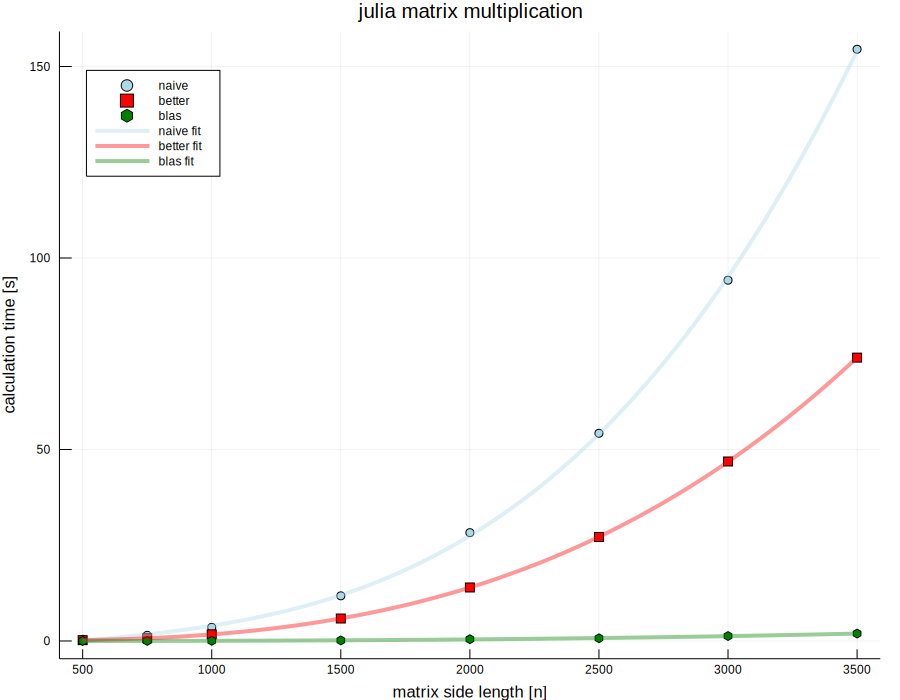

In [7]:
j_plot_naive = scatter(
    title = "julia matrix multiplication",
    j_df[j_df[:func].== "julia naive", :][:size],
    j_df[j_df[:func].== "julia naive", :][:time_mean],
    size = (900, 700),
    markershape = :circle,
    markercolor = :lightblue,
    xlabel = "matrix side length [n]",
    ylabel = "calculation time [s]",
    yscale = :identity,
    label = "naive",
    legend = :topleft)

j_plot_better = scatter!(
    j_df[j_df[:func].== "julia better", :][:size],
    j_df[j_df[:func].== "julia better", :][:time_mean],
    markershape = :square,
    markercolor = :red,
    label = "better")

j_plot_blas = scatter!(
    j_df[j_df[:func].== "julia blas", :][:size],
    j_df[j_df[:func].== "julia blas", :][:time_mean],
    markershape = :hexagon,
    markercolor = :green,
    label = "blas")



j_fit_naive = polyfit(
    j_df[j_df[:func].== "julia naive", :][:size],
    j_df[j_df[:func].== "julia naive", :][:time_mean],
    3)

j_fit_better = polyfit(
    j_df[j_df[:func].== "julia better", :][:size],
    j_df[j_df[:func].== "julia better", :][:time_mean],
    3)

j_fit_blas = polyfit(
    j_df[j_df[:func].== "julia blas", :][:size],
    j_df[j_df[:func].== "julia blas", :][:time_mean],
    3)

r = 500:30:3500

plot!(
    r,
    polyval(j_fit_naive, r),
    label = "naive fit",
    linecolor = :lightblue,
    linewidth = 4,
    linealpha = 0.4)

plot!(
    r,
    polyval(j_fit_better, r),
    label = "better fit",
    linecolor = :red,
    linewidth = 4,
    linealpha = 0.4)

plot!(
    r,
    polyval(j_fit_blas, r),
    label = "blas fit",
    linecolor = :green,
    linewidth = 4,
    linealpha = 0.4)

# C functions performance (compiler optimizations disabled)

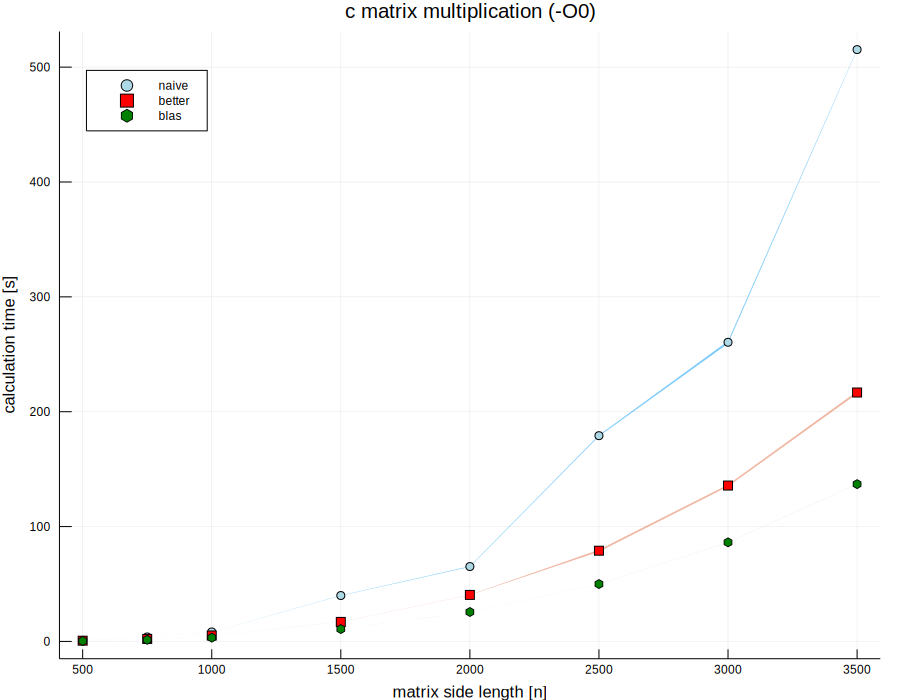

In [8]:
c0_plot_naive = scatter(
    title = "c matrix multiplication (-O0)",
    c0_df[c0_df[:func].== "C naive -O0", :][:size],
    c0_df[c0_df[:func].== "C naive -O0", :][:time_mean],
    ribbon = c0_df[c0_df[:func].== "C naive -O0", :][:time_stddev],
    size = (900, 700),
    markershape = :circle,
    markercolor = :lightblue,
    xlabel = "matrix side length [n]",
    ylabel = "calculation time [s]",
    yscale = :identity,
    label = "naive",
    legend = :topleft)

c0_plot_better = scatter!(
    c0_df[c0_df[:func].== "C better -O0", :][:size],
    c0_df[c0_df[:func].== "C better -O0", :][:time_mean],
    ribbon = c0_df[c0_df[:func].== "C better -O0", :][:time_stddev],
    markershape = :square,
    markercolor = :red,
    label = "better")

c0_plot_blas = scatter!(
    c0_df[c0_df[:func].== "C blas -O0", :][:size],
    c0_df[c0_df[:func].== "C blas -O0", :][:time_mean],
    ribbon = c0_df[c0_df[:func].== "C blas -O0", :][:time_stddev],
    markershape = :hexagon,
    markercolor = :green,
    label = "blas")

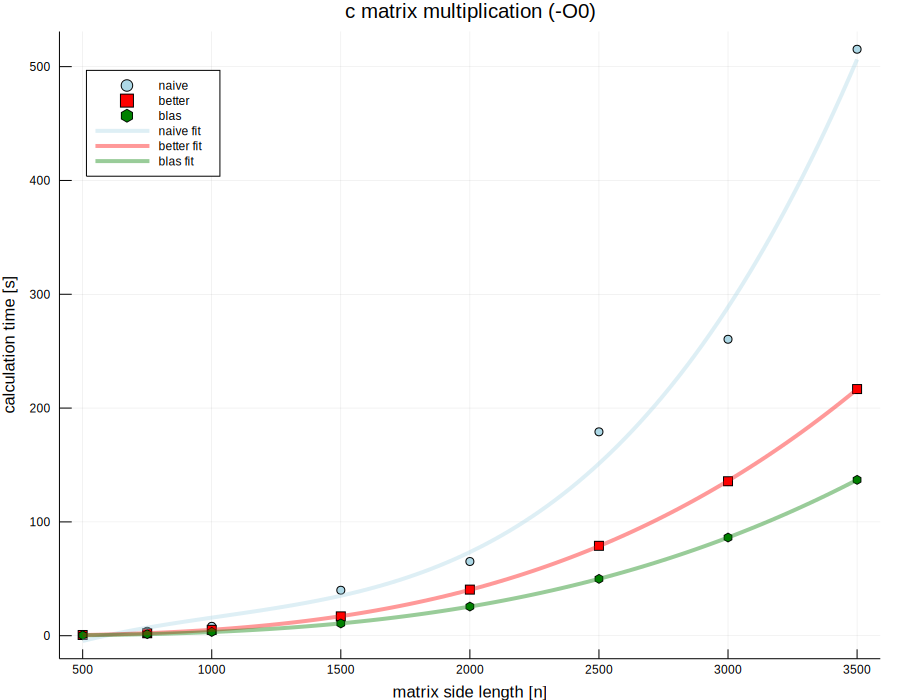

In [9]:
c0_plot_naive = scatter(
    title = "c matrix multiplication (-O0)",
    c0_df[c0_df[:func].== "C naive -O0", :][:size],
    c0_df[c0_df[:func].== "C naive -O0", :][:time_mean],
    size = (900, 700),
    markershape = :circle,
    markercolor = :lightblue,
    xlabel = "matrix side length [n]",
    ylabel = "calculation time [s]",
    yscale = :identity,
    label = "naive",
    legend = :topleft)

c0_plot_better = scatter!(
    c0_df[c0_df[:func].== "C better -O0", :][:size],
    c0_df[c0_df[:func].== "C better -O0", :][:time_mean],
    markershape = :square,
    markercolor = :red,
    label = "better")

c0_plot_blas = scatter!(
    c0_df[c0_df[:func].== "C blas -O0", :][:size],
    c0_df[c0_df[:func].== "C blas -O0", :][:time_mean],
    markershape = :hexagon,
    markercolor = :green,
    label = "blas")


c0_fit_naive = polyfit(
    c0_df[c0_df[:func].== "C naive -O0", :][:size],
    c0_df[c0_df[:func].== "C naive -O0", :][:time_mean],
    3)

c0_fit_better = polyfit(
    c0_df[c0_df[:func].== "C better -O0", :][:size],
    c0_df[c0_df[:func].== "C better -O0", :][:time_mean],
    3)

c0_fit_blas = polyfit(
    c0_df[c0_df[:func].== "C blas -O0", :][:size],
    c0_df[c0_df[:func].== "C blas -O0", :][:time_mean],
    3)

r = 500:30:3500

plot!(
    r,
    polyval(c0_fit_naive, r),
    label = "naive fit",
    linecolor = :lightblue,
    linewidth = 4,
    linealpha = 0.4)

plot!(
    r,
    polyval(c0_fit_better, r),
    label = "better fit",
    linecolor = :red,
    linewidth = 4,
    linealpha = 0.4)

plot!(
    r,
    polyval(c0_fit_blas, r),
    label = "blas fit",
    linecolor = :green,
    linewidth = 4,
    linealpha = 0.4)

# C functions performance (compiled with -O3 flag)

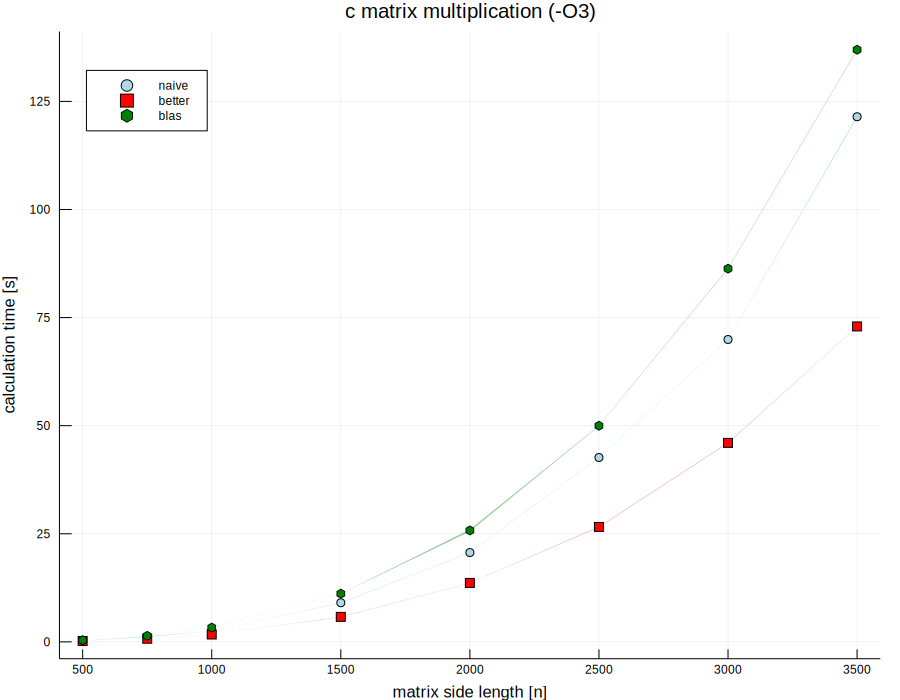

In [10]:
c3_plot_naive = scatter(
    title = "c matrix multiplication (-O3)",
    c3_df[c3_df[:func].== "C naive -O3", :][:size],
    c3_df[c3_df[:func].== "C naive -O3", :][:time_mean],
    ribbon = c3_df[c3_df[:func].== "C naive -O3", :][:time_stddev],
    size = (900, 700),
    markershape = :circle,
    markercolor = :lightblue,
    xlabel = "matrix side length [n]",
    ylabel = "calculation time [s]",
    yscale = :identity,
    label = "naive",
    legend = :topleft)

c3_plot_better = scatter!(
    c3_df[c3_df[:func].== "C better -O3", :][:size],
    c3_df[c3_df[:func].== "C better -O3", :][:time_mean],
    ribbon = c3_df[c3_df[:func].== "C better -O3", :][:time_stddev],
    markershape = :square,
    markercolor = :red,
    label = "better")

c3_plot_blas = scatter!(
    c3_df[c3_df[:func].== "C blas -O3", :][:size],
    c3_df[c3_df[:func].== "C blas -O3", :][:time_mean],
    ribbon = c3_df[c3_df[:func].== "C blas -O3", :][:time_stddev],
    markershape = :hexagon,
    markercolor = :green,
    label = "blas")

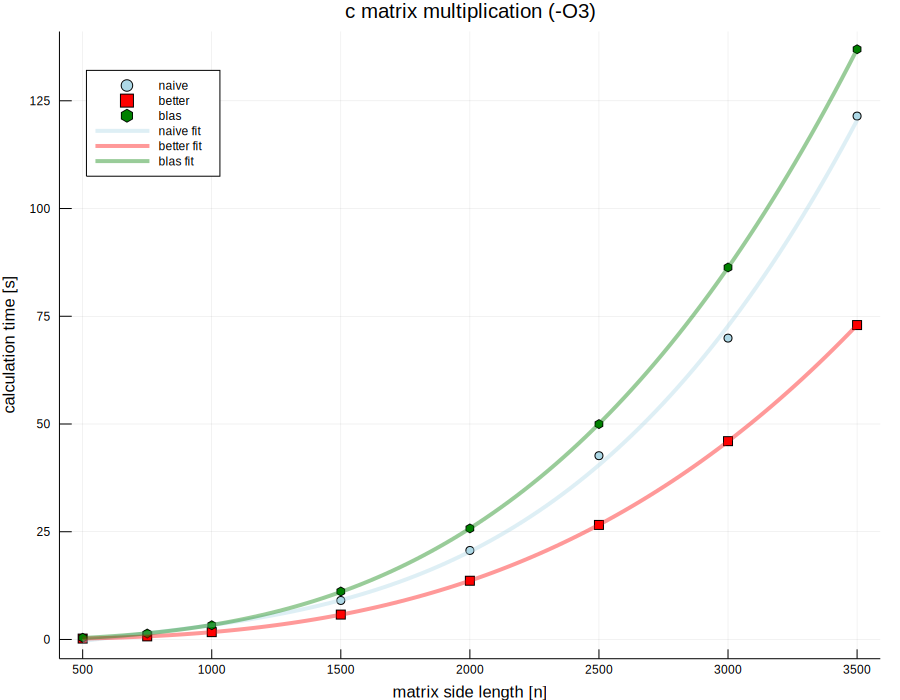

In [11]:
c3_plot_naive = scatter(
    title = "c matrix multiplication (-O3)",
    c3_df[c3_df[:func].== "C naive -O3", :][:size],
    c3_df[c3_df[:func].== "C naive -O3", :][:time_mean],
    size = (900, 700),
    markershape = :circle,
    markercolor = :lightblue,
    xlabel = "matrix side length [n]",
    ylabel = "calculation time [s]",
    yscale = :identity,
    label = "naive",
    legend = :topleft)

c3_plot_better = scatter!(
    c3_df[c3_df[:func].== "C better -O3", :][:size],
    c3_df[c3_df[:func].== "C better -O3", :][:time_mean],
    markershape = :square,
    markercolor = :red,
    label = "better")

c3_plot_blas = scatter!(
    c3_df[c3_df[:func].== "C blas -O3", :][:size],
    c3_df[c3_df[:func].== "C blas -O3", :][:time_mean],
    markershape = :hexagon,
    markercolor = :green,
    label = "blas")



c3_fit_naive = polyfit(
    c3_df[c3_df[:func].== "C naive -O3", :][:size],
    c3_df[c3_df[:func].== "C naive -O3", :][:time_mean],
    3)

c3_fit_better = polyfit(
    c3_df[c3_df[:func].== "C better -O3", :][:size],
    c3_df[c3_df[:func].== "C better -O3", :][:time_mean],
    3)

c3_fit_blas = polyfit(
    c3_df[c3_df[:func].== "C blas -O3", :][:size],
    c3_df[c3_df[:func].== "C blas -O3", :][:time_mean],
    3)

r = 500:30:3500

plot!(
    r,
    polyval(c3_fit_naive, r),
    label = "naive fit",
    linecolor = :lightblue,
    linewidth = 4,
    linealpha = 0.4)

plot!(
    r,
    polyval(c3_fit_better, r),
    label = "better fit",
    linecolor = :red,
    linewidth = 4,
    linealpha = 0.4)

plot!(
    r,
    polyval(c3_fit_blas, r),
    label = "blas fit",
    linecolor = :green,
    linewidth = 4,
    linealpha = 0.4)

# C functions performance (-O0 vs -O3 optimization)

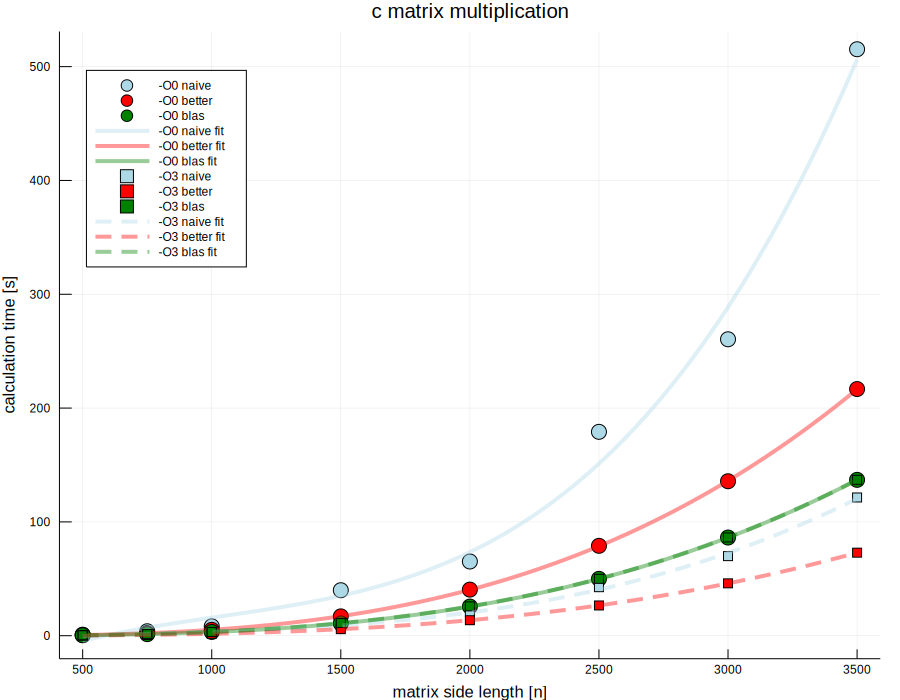

In [22]:
#######################################################################################
# disabled optimization (-O0) plots:
#######################################################################################

c0_plot_naive = scatter(
    title = "c matrix multiplication",
    c0_df[c0_df[:func].== "C naive -O0", :][:size],
    c0_df[c0_df[:func].== "C naive -O0", :][:time_mean],
    size = (900, 700),
    markershape = :circle,
    markercolor = :lightblue,
    markersize = 8,
    xlabel = "matrix side length [n]",
    ylabel = "calculation time [s]",
    yscale = :identity,
    label = "-O0 naive",
    legend = :topleft)

c0_plot_better = scatter!(
    c0_df[c0_df[:func].== "C better -O0", :][:size],
    c0_df[c0_df[:func].== "C better -O0", :][:time_mean],
    markershape = :circle,
    markercolor = :red,
    markersize = 8,
    label = "-O0 better")

c0_plot_blas = scatter!(
    c0_df[c0_df[:func].== "C blas -O0", :][:size],
    c0_df[c0_df[:func].== "C blas -O0", :][:time_mean],
    markershape = :circle,
    markercolor = :green,
    markersize = 8,
    label = "-O0 blas")


c0_fit_naive = polyfit(
    c0_df[c0_df[:func].== "C naive -O0", :][:size],
    c0_df[c0_df[:func].== "C naive -O0", :][:time_mean],
    3)

c0_fit_better = polyfit(
    c0_df[c0_df[:func].== "C better -O0", :][:size],
    c0_df[c0_df[:func].== "C better -O0", :][:time_mean],
    3)

c0_fit_blas = polyfit(
    c0_df[c0_df[:func].== "C blas -O0", :][:size],
    c0_df[c0_df[:func].== "C blas -O0", :][:time_mean],
    3)

r = 500:30:3500

plot!(
    r,
    polyval(c0_fit_naive, r),
    label = "-O0 naive fit",
    linecolor = :lightblue,
    linewidth = 4,
    linealpha = 0.4)

plot!(
    r,
    polyval(c0_fit_better, r),
    label = "-O0 better fit",
    linecolor = :red,
    linewidth = 4,
    linealpha = 0.4)

plot!(
    r,
    polyval(c0_fit_blas, r),
    label = "-O0 blas fit",
    linecolor = :green,
    linewidth = 4,
    linealpha = 0.4)

#######################################################################################
# -O3 optimization plots:
#######################################################################################

c3_plot_naive = scatter!(
    c3_df[c3_df[:func].== "C naive -O3", :][:size],
    c3_df[c3_df[:func].== "C naive -O3", :][:time_mean],
    size = (900, 700),
    markershape = :square,
    markercolor = :lightblue,
    label = "-O3 naive",
    legend = :topleft)

c3_plot_better = scatter!(
    c3_df[c3_df[:func].== "C better -O3", :][:size],
    c3_df[c3_df[:func].== "C better -O3", :][:time_mean],
    markershape = :square,
    markercolor = :red,
    label = "-O3 better")

c3_plot_blas = scatter!(
    c3_df[c3_df[:func].== "C blas -O3", :][:size],
    c3_df[c3_df[:func].== "C blas -O3", :][:time_mean],
    markershape = :square,
    markercolor = :green,
    label = "-O3 blas")



c3_fit_naive = polyfit(
    c3_df[c3_df[:func].== "C naive -O3", :][:size],
    c3_df[c3_df[:func].== "C naive -O3", :][:time_mean],
    3)

c3_fit_better = polyfit(
    c3_df[c3_df[:func].== "C better -O3", :][:size],
    c3_df[c3_df[:func].== "C better -O3", :][:time_mean],
    3)

c3_fit_blas = polyfit(
    c3_df[c3_df[:func].== "C blas -O3", :][:size],
    c3_df[c3_df[:func].== "C blas -O3", :][:time_mean],
    3)

r = 500:30:3500

plot!(
    r,
    polyval(c3_fit_naive, r),
    label = "-O3 naive fit",
    linecolor = :lightblue,
    linestyle = :dash,
    linewidth = 4,
    linealpha = 0.4)

plot!(
    r,
    polyval(c3_fit_better, r),
    label = "-O3 better fit",
    linecolor = :red,
    linestyle = :dash,
    linewidth = 4,
    linealpha = 0.4)

plot!(
    r,
    polyval(c3_fit_blas, r),
    label = "-O3 blas fit",
    linecolor = :green,
    linestyle = :dash,
    linewidth = 4,
    linealpha = 0.4)

# Julia vs C performance

### C compiler optimizations disabled

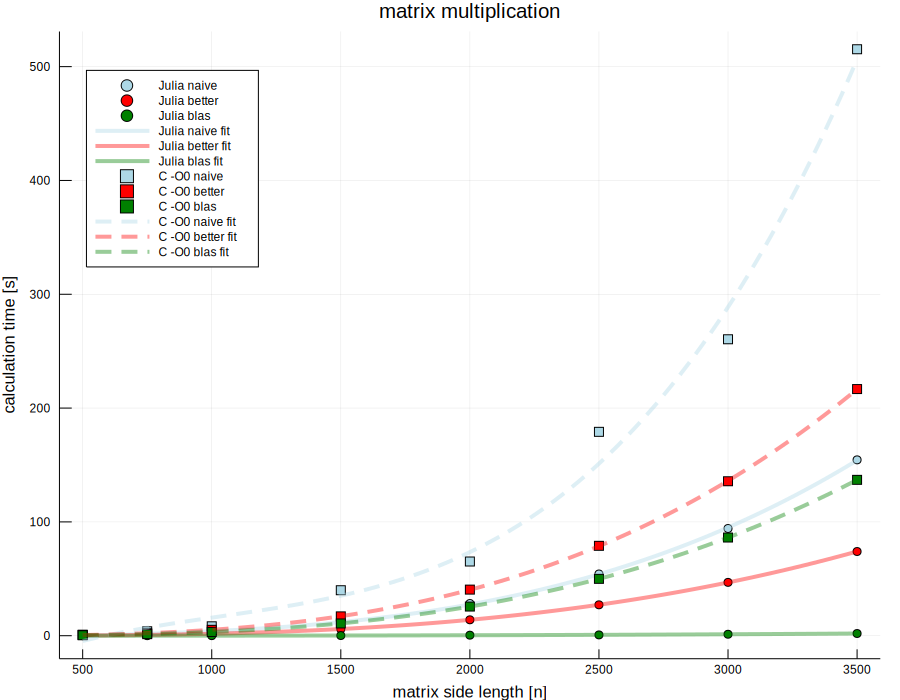

In [38]:
#######################################################################################
# Julia plots:
#######################################################################################

j_plot_naive = scatter(
    title = "matrix multiplication",
    j_df[j_df[:func].== "julia naive", :][:size],
    j_df[j_df[:func].== "julia naive", :][:time_mean],
    size = (900, 700),
    markershape = :circle,
    markercolor = :lightblue,
    xlabel = "matrix side length [n]",
    ylabel = "calculation time [s]",
    yscale = :identity,
    label = "Julia naive",
    legend = :topleft)

j_plot_better = scatter!(
    j_df[j_df[:func].== "julia better", :][:size],
    j_df[j_df[:func].== "julia better", :][:time_mean],
    markershape = :circle,
    markercolor = :red,
    label = "Julia better")

j_plot_blas = scatter!(
    j_df[j_df[:func].== "julia blas", :][:size],
    j_df[j_df[:func].== "julia blas", :][:time_mean],
    markershape = :circle,
    markercolor = :green,
    label = "Julia blas")


#==#
j_fit_naive = polyfit(
    j_df[j_df[:func].== "julia naive", :][:size],
    j_df[j_df[:func].== "julia naive", :][:time_mean],
    3)

j_fit_better = polyfit(
    j_df[j_df[:func].== "julia better", :][:size],
    j_df[j_df[:func].== "julia better", :][:time_mean],
    3)

j_fit_blas = polyfit(
    j_df[j_df[:func].== "julia blas", :][:size],
    j_df[j_df[:func].== "julia blas", :][:time_mean],
    3)

r = 500:30:3500

plot!(
    r,
    polyval(j_fit_naive, r),
    label = "Julia naive fit",
    linecolor = :lightblue,
    linewidth = 4,
    linealpha = 0.4)

plot!(
    r,
    polyval(j_fit_better, r),
    label = "Julia better fit",
    linecolor = :red,
    linewidth = 4,
    linealpha = 0.4)

plot!(
    r,
    polyval(j_fit_blas, r),
    label = "Julia blas fit",
    linecolor = :green,
    linewidth = 4,
    linealpha = 0.4)
#==#
#######################################################################################
# C (-O0) plots:
#######################################################################################

c0_plot_naive = scatter!(
    c0_df[c0_df[:func].== "C naive -O0", :][:size],
    c0_df[c0_df[:func].== "C naive -O0", :][:time_mean],
    size = (900, 700),
    markershape = :square,
    markercolor = :lightblue,
    label = "C -O0 naive",
    legend = :topleft)

c0_plot_better = scatter!(
    c0_df[c0_df[:func].== "C better -O0", :][:size],
    c0_df[c0_df[:func].== "C better -O0", :][:time_mean],
    markershape = :square,
    markercolor = :red,
    label = "C -O0 better")

c0_plot_blas = scatter!(
    c0_df[c0_df[:func].== "C blas -O0", :][:size],
    c0_df[c0_df[:func].== "C blas -O0", :][:time_mean],
    markershape = :square,
    markercolor = :green,
    label = "C -O0 blas")
#==#
c0_fit_naive = polyfit(
    c0_df[c0_df[:func].== "C naive -O0", :][:size],
    c0_df[c0_df[:func].== "C naive -O0", :][:time_mean],
    3)

c0_fit_better = polyfit(
    c0_df[c0_df[:func].== "C better -O0", :][:size],
    c0_df[c0_df[:func].== "C better -O0", :][:time_mean],
    3)

c0_fit_blas = polyfit(
    c0_df[c0_df[:func].== "C blas -O0", :][:size],
    c0_df[c0_df[:func].== "C blas -O0", :][:time_mean],
    3)

r = 500:30:3500

plot!(
    r,
    polyval(c0_fit_naive, r),
    label = "C -O0 naive fit",
    linecolor = :lightblue,
    linestyle = :dash,
    linewidth = 4,
    linealpha = 0.4)

plot!(
    r,
    polyval(c0_fit_better, r),
    label = "C -O0 better fit",
    linecolor = :red,
    linestyle = :dash,
    linewidth = 4,
    linealpha = 0.4)

plot!(
    r,
    polyval(c0_fit_blas, r),
    label = "C -O0 blas fit",
    linecolor = :green,
    linestyle = :dash,
    linewidth = 4,
    linealpha = 0.4)
#==#

### C compiled with -O3 flag

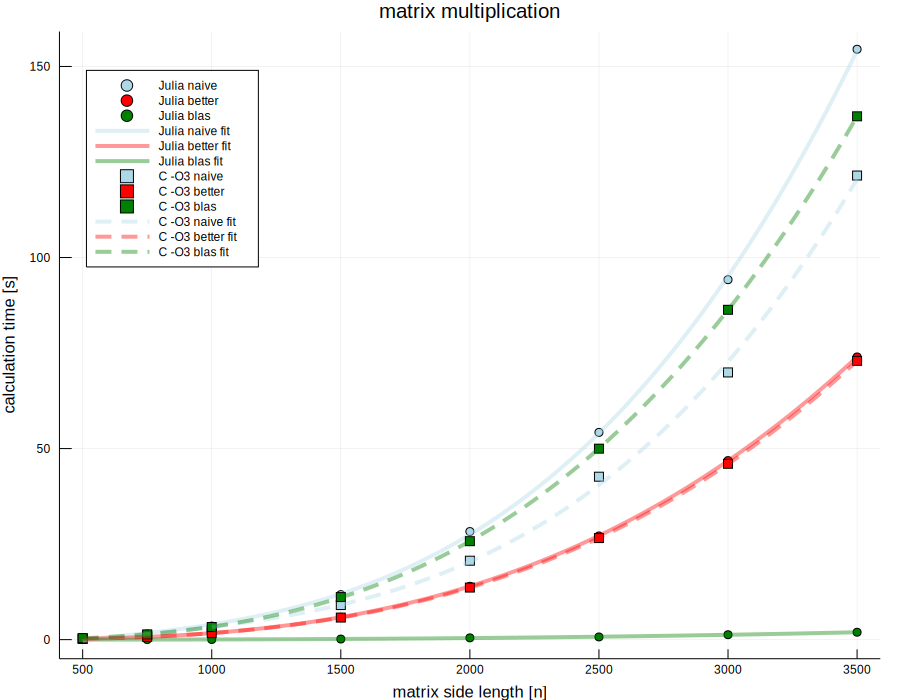

In [39]:
#######################################################################################
# Julia plots:
#######################################################################################

j_plot_naive = scatter(
    title = "matrix multiplication",
    j_df[j_df[:func].== "julia naive", :][:size],
    j_df[j_df[:func].== "julia naive", :][:time_mean],
    size = (900, 700),
    markershape = :circle,
    markercolor = :lightblue,
    xlabel = "matrix side length [n]",
    ylabel = "calculation time [s]",
    yscale = :identity,
    label = "Julia naive",
    legend = :topleft)

j_plot_better = scatter!(
    j_df[j_df[:func].== "julia better", :][:size],
    j_df[j_df[:func].== "julia better", :][:time_mean],
    markershape = :circle,
    markercolor = :red,
    label = "Julia better")

j_plot_blas = scatter!(
    j_df[j_df[:func].== "julia blas", :][:size],
    j_df[j_df[:func].== "julia blas", :][:time_mean],
    markershape = :circle,
    markercolor = :green,
    label = "Julia blas")


#==#
j_fit_naive = polyfit(
    j_df[j_df[:func].== "julia naive", :][:size],
    j_df[j_df[:func].== "julia naive", :][:time_mean],
    3)

j_fit_better = polyfit(
    j_df[j_df[:func].== "julia better", :][:size],
    j_df[j_df[:func].== "julia better", :][:time_mean],
    3)

j_fit_blas = polyfit(
    j_df[j_df[:func].== "julia blas", :][:size],
    j_df[j_df[:func].== "julia blas", :][:time_mean],
    3)

r = 500:30:3500

plot!(
    r,
    polyval(j_fit_naive, r),
    label = "Julia naive fit",
    linecolor = :lightblue,
    linewidth = 4,
    linealpha = 0.4)

plot!(
    r,
    polyval(j_fit_better, r),
    label = "Julia better fit",
    linecolor = :red,
    linewidth = 4,
    linealpha = 0.4)

plot!(
    r,
    polyval(j_fit_blas, r),
    label = "Julia blas fit",
    linecolor = :green,
    linewidth = 4,
    linealpha = 0.4)
#==#
#######################################################################################
# C (-O0) plots:
#######################################################################################

c3_plot_naive = scatter!(
    c3_df[c3_df[:func].== "C naive -O3", :][:size],
    c3_df[c3_df[:func].== "C naive -O3", :][:time_mean],
    size = (900, 700),
    markershape = :square,
    markercolor = :lightblue,
    label = "C -O3 naive",
    legend = :topleft)

c3_plot_better = scatter!(
    c3_df[c3_df[:func].== "C better -O3", :][:size],
    c3_df[c3_df[:func].== "C better -O3", :][:time_mean],
    markershape = :square,
    markercolor = :red,
    label = "C -O3 better")

c3_plot_blas = scatter!(
    c3_df[c3_df[:func].== "C blas -O3", :][:size],
    c3_df[c3_df[:func].== "C blas -O3", :][:time_mean],
    markershape = :square,
    markercolor = :green,
    label = "C -O3 blas")


#==#
c3_fit_naive = polyfit(
    c3_df[c3_df[:func].== "C naive -O3", :][:size],
    c3_df[c3_df[:func].== "C naive -O3", :][:time_mean],
    3)

c3_fit_better = polyfit(
    c3_df[c3_df[:func].== "C better -O3", :][:size],
    c3_df[c3_df[:func].== "C better -O3", :][:time_mean],
    3)

c3_fit_blas = polyfit(
    c3_df[c3_df[:func].== "C blas -O3", :][:size],
    c3_df[c3_df[:func].== "C blas -O3", :][:time_mean],
    3)

r = 500:30:3500

plot!(
    r,
    polyval(c3_fit_naive, r),
    label = "C -O3 naive fit",
    linecolor = :lightblue,
    linestyle = :dash,
    linewidth = 4,
    linealpha = 0.4)

plot!(
    r,
    polyval(c3_fit_better, r),
    label = "C -O3 better fit",
    linecolor = :red,
    linestyle = :dash,
    linewidth = 4,
    linealpha = 0.4)

plot!(
    r,
    polyval(c3_fit_blas, r),
    label = "C -O3 blas fit",
    linecolor = :green,
    linestyle = :dash,
    linewidth = 4,
    linealpha = 0.4)
#==#